In [ ]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

In [ ]:
# setting options to display max rows and columns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# loading the dataset

from google.colab import drive

drive.mount('/content/drive')

df = pd.read_csv("/content/drive/My Drive/Files for Colab/marketing_campaign.csv", delimiter='\t')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **About Dataset**

## **Context**

### **Problem Statement**  
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

___

### **Attributes**

### 1. People
- ID: Customer's unique identifier  
- Year_Birth: Customer's birth year  
- Education: Customer's education level  
- Marital_Status: Customer's marital status  
- Income: Customer's yearly household income  
- Kidhome: Number of children in customer's household  
- Teenhome: Number of teenagers in customer's household  
- Dt_Customer: Date of customer's enrollment with the company  
- Recency: Number of days since customer's last purchase  
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

### 2. Products  
- MntWines: Amount spent on wine in last 2 years  
- MntFruits: Amount spent on fruits in last 2 years  
- MntMeatProducts: Amount spent on meat in last 2 years  
- MntFishProducts: Amount spent on fish in last 2 years  
- MntSweetProducts: Amount spent on sweets in last 2 years  
- MntGoldProds: Amount spent on gold in last 2 years  

### 3. Promotion
- NumDealsPurchases: Number of purchases made with a discount  
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise  
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise  
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise  
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise  

### 4. Place
- NumWebPurchases: Number of purchases made through the company’s website  
- NumCatalogPurchases: Number of purchases made using a catalogue  
- NumStorePurchases: Number of purchases made directly in stores  
- NumWebVisitsMonth: Number of visits to company’s website in the last month  

___

### **Target**
Need to perform clustering to summarize customer segments.

___

### **Acknowledgement**
The dataset for this project is provided by Dr. Omar Romero-Hernandez.

___

## Data Exploration

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
# Count of unique values for categorical features
categorical_features = ['Education', 'Marital_Status']
categorical_unique_counts = {col: df[col].nunique() for col in categorical_features}

print(categorical_unique_counts)

{'Education': 5, 'Marital_Status': 8}


In [ ]:
# Frequency distribution of categorical features
categorical_frequency = {col: df[col].value_counts() for col in categorical_features}

print(categorical_frequency)

{'Education': Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64, 'Marital_Status': Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64}


In [ ]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

## Summary Statistics and Potential Preprocessing Steps

###Numerical Features:  
- Income: Contains 24 missing values. These need to be handled, possibly through imputation.  
- Year_Birth: The minimum year of birth is 1893, which might indicate outliers or erroneous data.  
- *Mnt (Product spending categories)**: These features have a wide range of values and may benefit from normalization or standardization.  
- *Num (Purchase counts)**: Similar to spending categories, these might require normalization, especially if used in distance-based clustering algorithms.


###Categorical Features:  
- Education: Has 5 unique categories. Consider encoding (e.g., one-hot encoding) for clustering algorithms.  
- Marital_Status: Has 8 unique categories, including less common statuses like 'Alone', 'Absurd', and 'YOLO'. These might need to be grouped or encoded differently.  

###Date Feature:  
Dt_Customer: The enrollment date could be transformed into a more useful feature, like tenure or days since enrollment.  


###Binary Features:  
AcceptedCmp1-5, Response, Complain: Already in a binary format, suitable for most clustering algorithms.  

###Constant Features:  
Z_CostContact, Z_Revenue: These appear to be constant and might not be useful for clustering. Consider dropping them unless they have a specific meaning or use.  


###Frequency Distribution of Categorical Features:  
Education and Marital_Status show varied distributions, which could be insightful for clustering. However, small categories in Marital_Status may need special treatment.

###Missing Values:  
Income: Needs imputation or removal of missing values.  

## Data Preprocessing

### Dropping missing values and constant columns

In [ ]:
# Dropping constant features: Z_CostContact and Z_Revenue
df_dropped = df.drop(columns=['Z_CostContact', 'Z_Revenue'])

# Handling missing values in the 'Income' column by dropping rows with missing income
df_cleaned = df_dropped.dropna(subset=['Income'])

# Displaying the first few rows of the cleaned dataframe
df_cleaned.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


### Identifying and dealing with outliers

In [ ]:
# Exploring the 'Year_Birth' column for potential outliers
year_birth_stats = df_cleaned['Year_Birth'].describe()

# Identifying potential outliers using IQR method
Q1 = year_birth_stats['25%']
Q3 = year_birth_stats['75%']
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Counting outliers
outliers = df_cleaned[(df_cleaned['Year_Birth'] < lower_bound) | (df_cleaned['Year_Birth'] > upper_bound)]
outlier_count = outliers.shape[0]

print(year_birth_stats)
print(lower_bound)
print(upper_bound)
print(outlier_count)
outliers['Year_Birth'].sort_values().unique()

count    2216.000000
mean     1968.820397
std        11.985554
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64
1932.0
2004.0
3


array([1893, 1899, 1900])

In [ ]:
# Printing the rows with the outliers in the 'Year_Birth' column
outlier_rows = df_cleaned[df_cleaned['Year_Birth'].isin([1893, 1899, 1900])]
outlier_rows

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0


In [ ]:
# Dropping the rows with outliers in the 'Year_Birth' column
df_cleaned_no_outliers = df_cleaned.drop(outlier_rows.index)

# Verifying the removal by checking if these rows still exist in the cleaned dataframe
verification = df_cleaned_no_outliers[df_cleaned_no_outliers['Year_Birth'].isin([1893, 1899, 1900])]
verification.empty, df_cleaned_no_outliers.shape

(True, (2213, 27))

### Dealing with issues in categorical columns

In [ ]:
# Dealing with issues in Marital_Status column

marital_status_counts = df_cleaned_no_outliers['Marital_Status'].value_counts()

marital_status_counts

Married     857
Together    572
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
# Replace "Alone" with "Single" in Marital_Status
df_cleaned_no_outliers['Marital_Status'].replace('Alone', 'Single', inplace=True)

In [ ]:
# Drop rows where Marital_Status is "Absurd" or "YOLO"
df_cleaned_no_outliers = df_cleaned_no_outliers[~df_cleaned_no_outliers['Marital_Status'].isin(['Absurd', 'YOLO'])]

# New value counts for Marital_Status after the replacements and drops
new_marital_status_counts = df_cleaned_no_outliers['Marital_Status'].value_counts()

new_marital_status_counts

Married     857
Together    572
Single      473
Divorced    231
Widow        76
Name: Marital_Status, dtype: int64

In [ ]:
# Previewing value counts in Education
education_counts = df_cleaned_no_outliers['Education'].value_counts()

education_counts

Graduation    1115
PhD            478
Master         364
2n Cycle       198
Basic           54
Name: Education, dtype: int64

### Dealing with Date Feature: Dt_Customer

In the code below the column Dt_Customer has been converted to Datetime format, then earliest and last date is identified     
Then another feature has been created Customer_Tenure_Days which shows number of days since the customer started using the service

In [ ]:
# Convert Dt_Customer column to datetime format
df_cleaned_no_outliers['Dt_Customer'] = pd.to_datetime(df_cleaned_no_outliers['Dt_Customer'], format='%d-%m-%Y')

# Finding the earliest and latest date in the Dt_Customer column
earliest_date = df_cleaned_no_outliers['Dt_Customer'].min()
latest_date = df_cleaned_no_outliers['Dt_Customer'].max()

# Calculating customer tenure as days from Dt_Customer to the current date
current_date = datetime.now()
df_cleaned_no_outliers['Customer_Tenure_Days'] = (current_date - df_cleaned_no_outliers['Dt_Customer']).dt.days

# Displaying the earliest and latest date, and the first few rows to see the new column
earliest_date, latest_date, df_cleaned_no_outliers[['Dt_Customer', 'Customer_Tenure_Days']].head()

(Timestamp('2012-07-30 00:00:00'),
 Timestamp('2014-06-29 00:00:00'),
   Dt_Customer  Customer_Tenure_Days
 0  2012-09-04                  4144
 1  2014-03-08                  3594
 2  2013-08-21                  3793
 3  2014-02-10                  3620
 4  2014-01-19                  3642)

### Label Encoding

In [ ]:
marital_status_encoded = pd.get_dummies(df_cleaned_no_outliers['Marital_Status'], prefix='Marital')
df_encoded = df_cleaned_no_outliers.join(marital_status_encoded)

In [ ]:
education_hierarchy = {'Basic': 1, 'Graduation': 2, '2n Cycle': 3, 'Master': 4, 'PhD': 5}
df_encoded['Education_Encoded'] = df_encoded['Education'].map(education_hierarchy)

### Dropping columns we don't need anymore

In [ ]:
# Since we have encoded marital status and education also created a useful feature from Dt Customer, we can drop these
df_final = df_encoded.drop(columns=['Marital_Status', 'Education', 'Dt_Customer'])

### Data Transformation

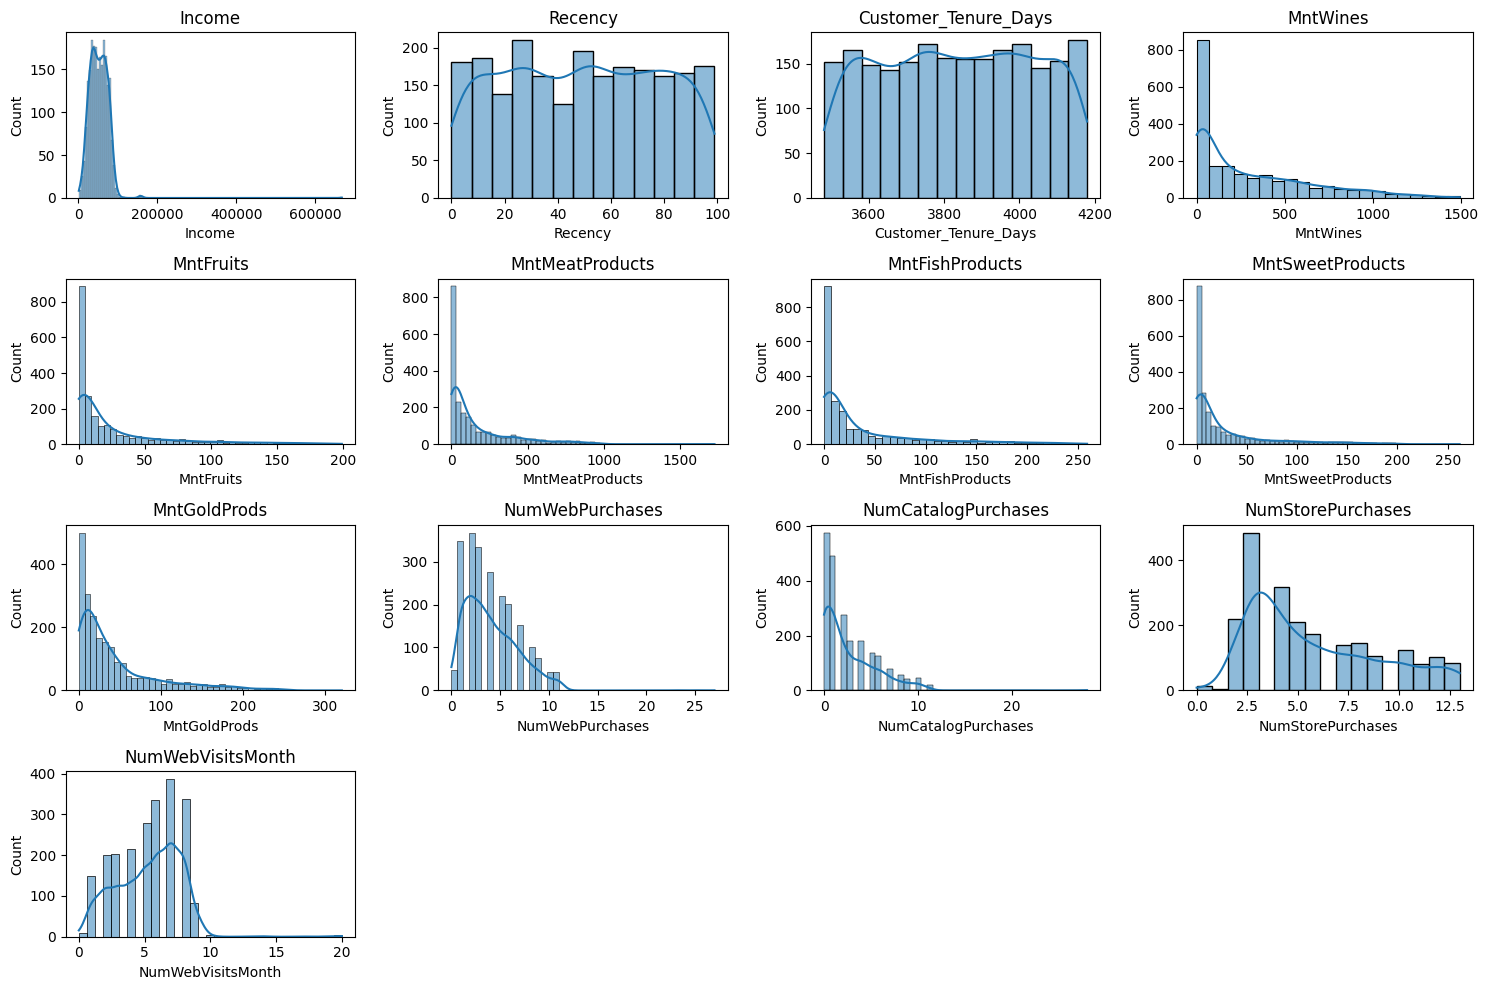

In [ ]:
# Columns to be visualized
columns_to_visualize = ['Income', 'Recency', 'Customer_Tenure_Days', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Plotting distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_visualize):
    plt.subplot(4, 4, i+1)
    sns.histplot(df_cleaned_no_outliers[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
# Creating separate dataframes for standardization and normalization
df_standardized = df_final.copy()
df_normalized = df_final.copy()

# List of columns to be scaled
columns_to_scale = ['Income', 'Recency', 'Customer_Tenure_Days', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Applying standardization
scaler = StandardScaler()
df_standardized[columns_to_scale] = scaler.fit_transform(df_standardized[columns_to_scale])

# Applying normalization
normalizer = MinMaxScaler()
df_normalized[columns_to_scale] = normalizer.fit_transform(df_normalized[columns_to_scale])

## Clustering

### Centroid-based (K-Means):

K-Means works well with standardized data because it minimizes variance within clusters and is sensitive to the scale of the data.  

using df_standardized

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df_standardized)
labels_kmeans = kmeans.labels_

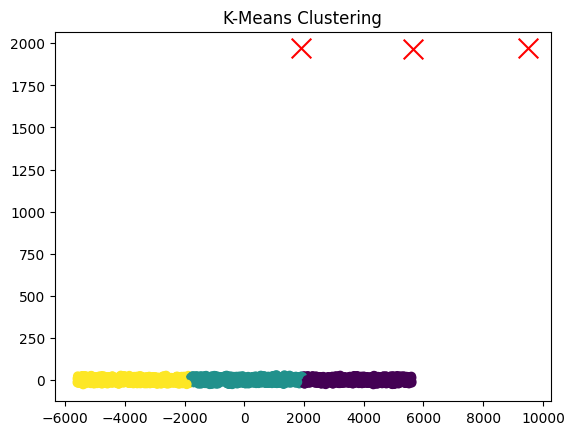

In [ ]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(df_standardized)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels_kmeans)  # Assuming labels_kmeans are your K-Means cluster labels
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red')  # Plot centroids
plt.title("K-Means Clustering")
plt.show()

In [ ]:
print("Centroids:\n", kmeans.cluster_centers_)

Centroids:
 [[ 9.51088953e+03  1.96924128e+03  1.79294188e-02  4.31686047e-01
   5.07267442e-01 -7.11705606e-02 -3.87446480e-02  1.57299918e-02
  -1.59481111e-02 -2.43902733e-02  1.31301786e-02 -3.43376599e-02
   2.26017442e+00 -3.22630186e-02 -2.63531363e-02 -2.79058604e-02
  -2.40382265e-02  6.54069767e-02  6.39534884e-02  6.83139535e-02
   5.81395349e-02  1.30813953e-02  1.16279070e-02  1.38081395e-01
  -6.60915419e-04  8.57558140e-02  4.06976744e-01  2.02034884e-01
   2.64534884e-01  4.06976744e-02  3.00872093e+00]
 [ 5.65292377e+03  1.96825581e+03 -9.39756876e-04  4.56072351e-01
   5.00000000e-01  3.45515276e-02  1.78390073e-02 -2.22305688e-02
   1.56721697e-02 -9.39834755e-04 -2.06655516e-02  2.64794568e-02
   2.27390181e+00  4.70131146e-02  4.88158223e-02  1.68273094e-02
   1.60927204e-02  7.23514212e-02  7.49354005e-02  7.49354005e-02
   6.20155039e-02  6.45994832e-03  9.04392765e-03  1.48578811e-01
  -1.47845971e-02  1.17571059e-01  3.74677003e-01  2.06718346e-01
   2.67441860

Internal evaluation

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette = silhouette_score(df_standardized, labels_kmeans)  # Replace with appropriate labels
calinski_harabasz = calinski_harabasz_score(df_standardized, labels_kmeans)
davies_bouldin = davies_bouldin_score(df_standardized, labels_kmeans)

print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Index:", calinski_harabasz)
print("Davies-Bouldin Index:", davies_bouldin)

Silhouette Score: 0.5978297772821328
Calinski-Harabasz Index: 9028.166937676864
Davies-Bouldin Index: 0.49510148196167886


**Silhouette Score:** 0.598  

The Silhouette Score ranges from -1 to 1. A score closer to 1 indicates that data points are well clustered and far from neighboring clusters. A score of 0.598 suggests that the clusters are reasonably well defined and separated from each other.

**Calinski-Harabasz Index:** 9028.17  
The Calinski-Harabasz Index is a measure of cluster validity. A higher score usually indicates that the clusters are dense and well separated, which is desirable in clustering. Your score is quite high, suggesting good clustering performance.

**Davies-Bouldin Index:** 0.495  
This index indicates the average 'similarity' between clusters, where lower values mean better separation between clusters. A value of 0.495, being on the lower side, indicates good clustering where each cluster is distinct from others.

**Interpretation**  
These metrics collectively suggest that your K-Means clustering has performed well in segmenting the data into distinct, well-separated groups.
The relatively high Calinski-Harabasz Index and low Davies-Bouldin Index, along with a decent Silhouette Score, indicate that the clusters are compact and well separated from each other.

#### Finding the optimal value of k

**Elbow Method**

- This graph plots the inertia (within-cluster sum of squares) against the number of clusters. Inertia decreases as the number of clusters increases because the data points are closer to the centroids they are assigned to.  
- The "elbow" point in the graph is where the rate of decrease in inertia sharply changes. This point is typically considered a good trade-off between the number of clusters and the sum of the distances of points from their nearest cluster center.  
- In your elbow method graph, the inertia decreases rapidly until around 3 or 4 clusters and then levels off. This suggests that the optimal number of clusters could be around 3 or 4, as additional clusters beyond this point do not significantly contribute to a decrease in inertia.

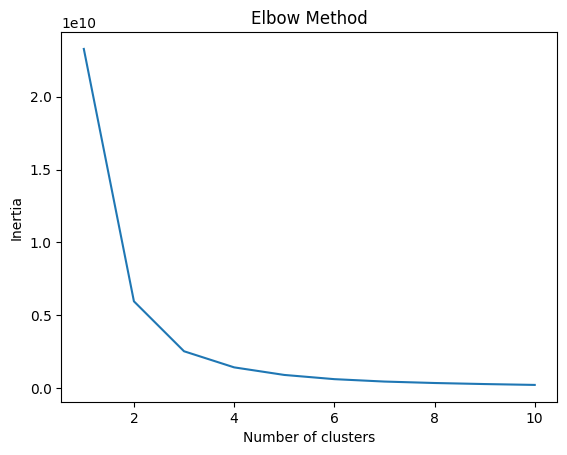

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for n in range(1, 11):  # Example: testing 1 to 10 clusters
    kmeans = KMeans(n_clusters=n, random_state=42).fit(df_standardized)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

**Silhouette Method**

- This graph shows the silhouette score for different numbers of clusters. The silhouette score measures how similar a data point is to its own cluster (cohesion) compared to other clusters (separation).  
- A higher silhouette score indicates better defined clusters. You generally look for the number of clusters that gives the highest silhouette score.  
- In your silhouette method graph, the highest silhouette score occurs at 2 clusters. The score decreases as the number of clusters increases, which implies that 2 clusters might be the optimal number based on the silhouette score.  

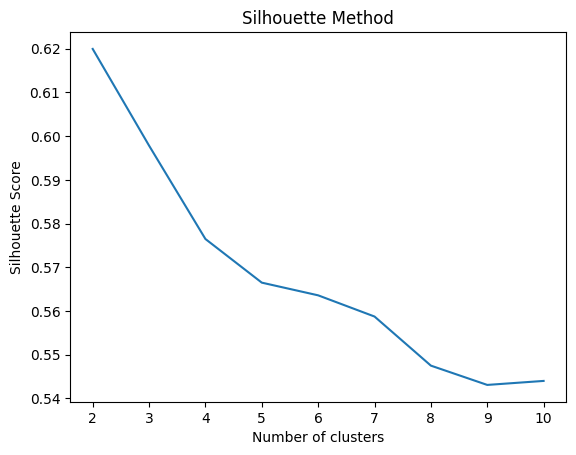

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for n in range(2, 11):  # Silhouette score is not defined for n=1
    kmeans = KMeans(n_clusters=n, random_state=42).fit(df_standardized)
    score = silhouette_score(df_standardized, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

Now we will test if applying PCA before applying clustering can create better clusters and result in better evaluation scores

### Principal Component Analysis (PCA)

Dimensionality reduction can be a crucial step before applying clustering models, especially when dealing with high-dimensional data. Here are some considerations to help you decide whether to apply dimensionality reduction:

**Curse of Dimensionality:**  
High-dimensional data can suffer from the "curse of dimensionality," where the volume of the space increases so much that the available data becomes sparse. This sparsity is problematic for any method that requires statistical significance.

**Noise Reduction:**  
Dimensionality reduction can help to remove noise from the data by retaining only the most significant features, which can improve the performance of clustering algorithms.

**Computational Efficiency:**  
Algorithms like K-Means become computationally expensive as the number of dimensions grows. Reducing the dimensionality can make these algorithms run faster.

**Visualization:**  
It's often useful to visualize the results of clustering to understand the distribution and relationships in your data. Dimensionality reduction is a must for visualizing high-dimensional data in two or three dimensions.

**Interpretability:**  
Fewer dimensions can make the model more interpretable since each dimension can be examined and understood by humans.

It's important to choose the number of components wisely. A good way to decide n_components is to look at the explained variance ratio from PCA and select a number of components that capture a high percentage of the variance in the data. You can plot the cumulative explained variance against the number of components to find an 'elbow' where additional components do not add much explanatory power.

We will explore what would be the ideal number of components to choose from

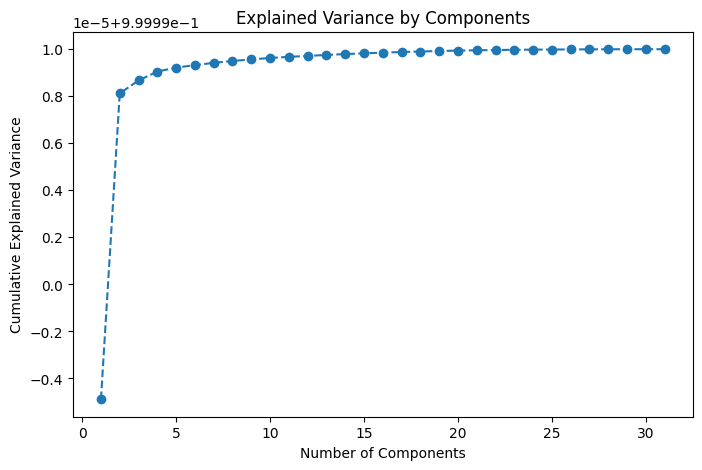

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming df_standardized is your standardized dataframe
pca = PCA().fit(df_standardized)

# Plotting the cumulative explained variance against the number of components
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

Now we will apply PCA

In [ ]:
# Perform PCA on standardized data
n_components_pca = 3  # This is based on the elbow point from the PCA variance graph
pca = PCA(n_components=n_components_pca)
df_standardized_pca = pca.fit_transform(df_standardized)


Now we can apply k means clustering the same way we did previously and do a comparison

### K means Clustering after PCA

In [ ]:
# Perform KMeans clustering on the PCA-reduced data
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(df_standardized_pca)
labels_kmeans_pca = kmeans_pca.labels_

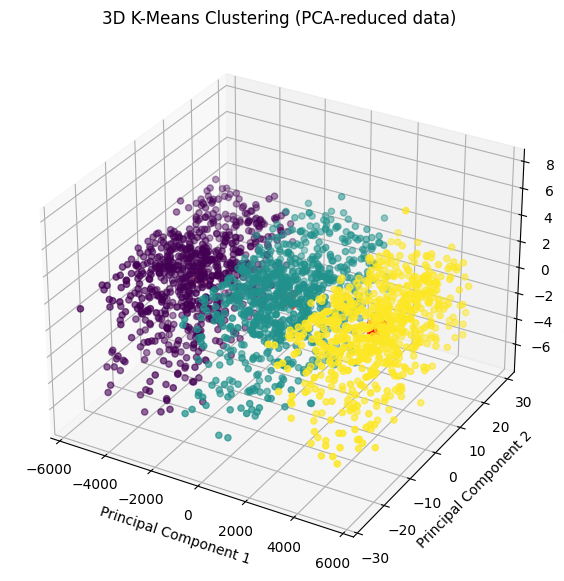

In [ ]:
# Visualize the 3D scatter plot for clusters obtained from PCA-reduced data
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_standardized_pca[:, 0], df_standardized_pca[:, 1], df_standardized_pca[:, 2], c=labels_kmeans_pca, cmap='viridis', marker='o')
centroids_pca = kmeans_pca.cluster_centers_
ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1], centroids_pca[:, 2], s=200, c='red', marker='X')
ax.set_title('3D K-Means Clustering (PCA-reduced data)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

In [ ]:
# Calculate and print evaluation metrics for clusters obtained from PCA-reduced data
silhouette_pca = silhouette_score(df_standardized_pca, labels_kmeans_pca)
calinski_harabasz_pca = calinski_harabasz_score(df_standardized_pca, labels_kmeans_pca)
davies_bouldin_pca = davies_bouldin_score(df_standardized_pca, labels_kmeans_pca)
print(f'Silhouette Score (PCA): {silhouette_pca:.3f}')
print(f'Calinski-Harabasz Index (PCA): {calinski_harabasz_pca:.3f}')
print(f'Davies-Bouldin Index (PCA): {davies_bouldin_pca:.3f}')

Silhouette Score (PCA): 0.598
Calinski-Harabasz Index (PCA): 9028.277
Davies-Bouldin Index (PCA): 0.495


Similar scores mean there was lots of noise in the data, so its better to apply PCA in such cases.

Given that PCA can help with visualization and may improve computational efficiency, you could opt to use the PCA-reduced data for ease of interpretation and further analysis, especially if you need to visualize the clusters or work with a very high-dimensional dataset.

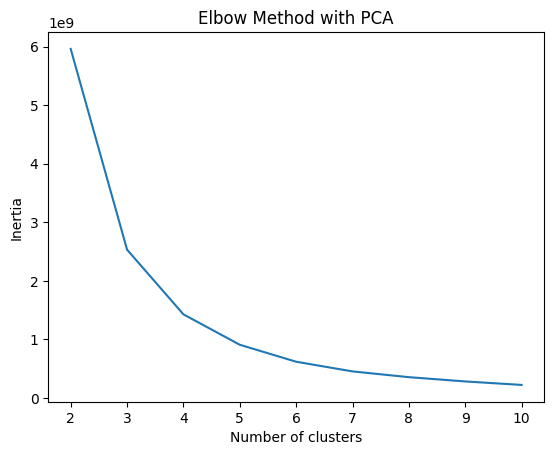

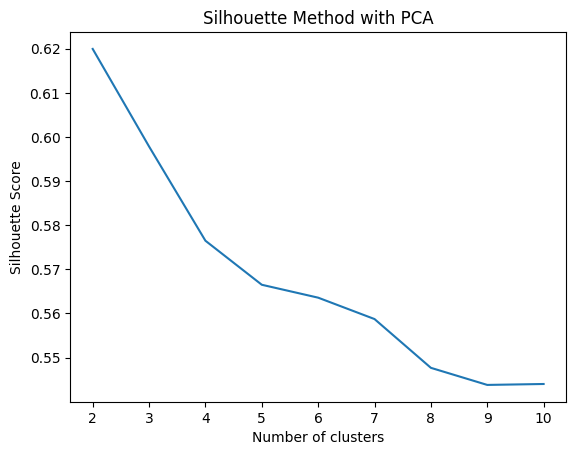

In [ ]:
# If you want to visualize the silhouette scores for different numbers of clusters
inertia_pca = []
silhouette_scores_pca = []
for n in range(2, 11):
    kmeans_temp = KMeans(n_clusters=n, random_state=42).fit(df_standardized_pca)
    inertia_pca.append(kmeans_temp.inertia_)
    silhouette_scores_pca.append(silhouette_score(df_standardized_pca, kmeans_temp.labels_))

# Plotting the elbow method graph for PCA-reduced data
plt.plot(range(2, 11), inertia_pca)
plt.title('Elbow Method with PCA')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


# Plotting the silhouette scores graph for PCA-reduced data
plt.plot(range(2, 11), silhouette_scores_pca)
plt.title('Silhouette Method with PCA')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

How to view the clusters?

In [ ]:
# Assuming df_cleaned_no_outliers is your original dataset before encoding, standardization, and PCA
df_with_clusters_no_pca = df_cleaned_no_outliers.copy()
df_with_clusters_no_pca['Cluster_Labels_No_PCA'] = labels_kmeans  # Labels from KMeans without PCA

df_with_clusters_pca = df_cleaned_no_outliers.copy()
df_with_clusters_pca['Cluster_Labels_PCA'] = labels_kmeans_pca  # Labels from KMeans with PCA

In [ ]:
# Analyzing clusters without PCA
cluster_summary_no_pca = df_with_clusters_no_pca.groupby('Cluster_Labels_No_PCA').mean()
print("Cluster Summary without PCA:\n", cluster_summary_no_pca)

# Analyzing clusters with PCA
cluster_summary_pca = df_with_clusters_pca.groupby('Cluster_Labels_PCA').mean()
print("Cluster Summary with PCA:\n", cluster_summary_pca)

Cluster Summary without PCA:
                                 ID   Year_Birth        Income   Kidhome  \
Cluster_Labels_No_PCA                                                     
0                      9510.889535  1969.241279  52673.395349  0.431686   
1                      5652.923773  1968.255814  52198.131783  0.456072   
2                      1902.576975  1969.277108  51830.401606  0.439090   

                       Teenhome    Recency    MntWines  MntFruits  \
Cluster_Labels_No_PCA                                               
0                      0.507267  46.986919  292.015988  26.917151   
1                      0.500000  50.045220  311.113695  25.409561   
2                      0.510040  49.906292  310.898260  26.631861   

                       MntMeatProducts  MntFishProducts  MntSweetProducts  \
Cluster_Labels_No_PCA                                                       
0                           163.360465        36.183140         27.593023   
1                

In [ ]:
df_with_clusters_no_pca.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Tenure_Days,Cluster_Labels_No_PCA
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,4144,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,3594,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,3793,1
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,3620,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,3642,1


In [ ]:
df_with_clusters_pca.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Tenure_Days,Cluster_Labels_PCA
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,4144,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,3594,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,3793,1
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,3620,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,3642,1


## The following are some more clustering methods

### Connectivity-based (Hierarchical Clustering):

Hierarchical Clustering can also benefit from standardized data, particularly if the features have different scales.

using df_standardized

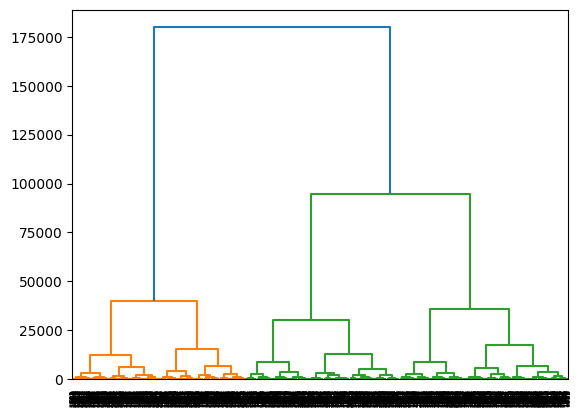

In [ ]:
# without pca

from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(df_standardized, method='ward')
dendrogram(linked)
plt.show()

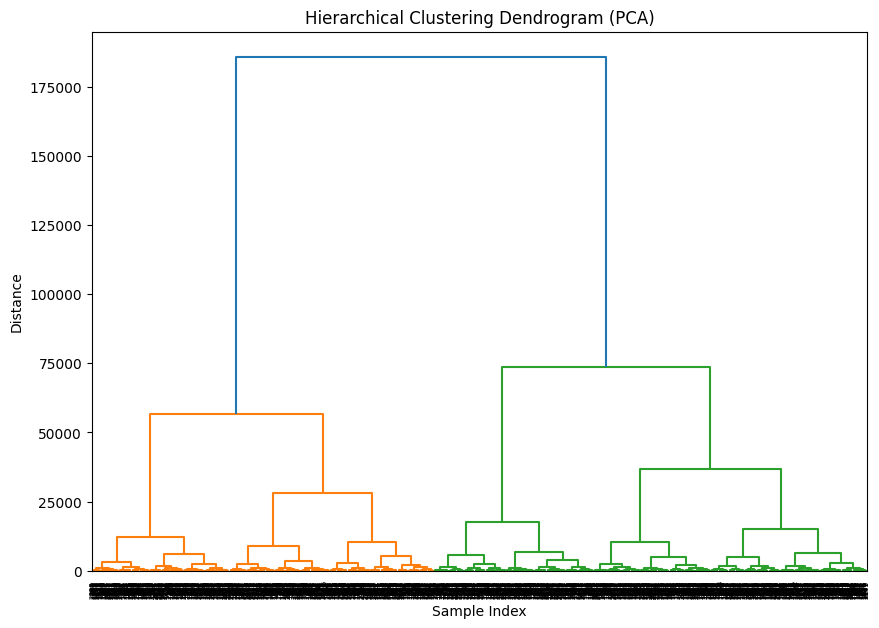

In [ ]:
# with PCA

from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering on PCA-reduced data
linked_pca = linkage(df_standardized_pca, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked_pca)
plt.title('Hierarchical Clustering Dendrogram (PCA)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Determine the clusters at the specified distance threshold
distance_threshold = 50000  # Replace with the appropriate distance based on your dendrogram
cluster_labels = fcluster(linked_pca, distance_threshold, criterion='distance')

In [ ]:
# Assuming df_standardized_pca is the PCA-reduced data used for clustering
silhouette_avg = silhouette_score(df_standardized_pca, cluster_labels)
calinski_harabasz = calinski_harabasz_score(df_standardized_pca, cluster_labels)
davies_bouldin = davies_bouldin_score(df_standardized_pca, cluster_labels)

print("Silhouette Score:", silhouette_avg)
print("Calinski-Harabasz Index:", calinski_harabasz)
print("Davies-Bouldin Index:", davies_bouldin)

Silhouette Score: 0.5380726070808661
Calinski-Harabasz Index: 9104.334482418672
Davies-Bouldin Index: 0.5000623993128813


In [ ]:
# Assuming df_cleaned_no_outliers is your original dataset
df_cleaned_no_outliers['Cluster'] = cluster_labels

In [ ]:
cluster_groups = df_cleaned_no_outliers.groupby('Cluster')

# Get means or other statistics for each cluster
cluster_means = cluster_groups.mean()
print(cluster_means)

# You can also examine other statistics like median, count, or standard deviation
# cluster_medians = cluster_groups.median()
# cluster_counts = cluster_groups.count()

                   ID   Year_Birth        Income   Kidhome  Teenhome  \
Cluster                                                                
1        10286.408163  1969.413265  52788.308673  0.433673  0.502551   
2         7676.395548  1968.558219  52248.886986  0.455479  0.508562   
3         1169.592998  1968.973742  51685.144420  0.446389  0.507659   
4         4240.063144  1968.877577  52231.291237  0.435567  0.503866   

           Recency    MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                                       
1        45.711735  282.354592  27.617347       154.897959        35.663265   
2        48.758562  302.936644  26.640411       173.113014        35.616438   
3        49.864333  300.273523  26.166302       170.286652        41.063457   
4        50.463918  321.039948  25.435567       166.396907        37.786082   

         MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
Cluster      

### Density-based (DBSCAN):

DBSCAN can work with either, but normalized data might be better if there are significant differences in scale, as DBSCAN is density-based and sensitive to the distance between points.

using df_normalized

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)  # Example parameters
labels_dbscan = dbscan.fit_predict(df_normalized)

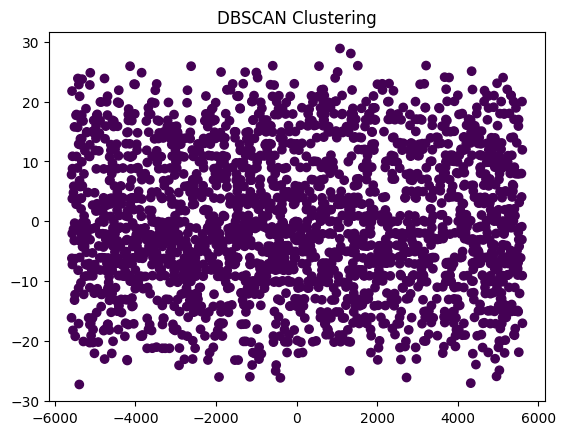

In [ ]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels_dbscan)  # Replace labels_dbscan with your DBSCAN labels
plt.title("DBSCAN Clustering")
plt.show()

In [ ]:
noise_points = sum(labels_dbscan == -1)
print("Noise Points:", noise_points)
# Further analysis can be done by examining the points in each cluster and those marked as noise

Noise Points: 2209


### Distribution-based (Gaussian Models):

Gaussian Mixture Models (a common distribution-based method) generally prefer standardized data, especially if the data is expected to conform to a normal distribution.

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)  # Example: 3 components
gmm.fit(df_standardized)
labels_gmm = gmm.predict(df_standardized)

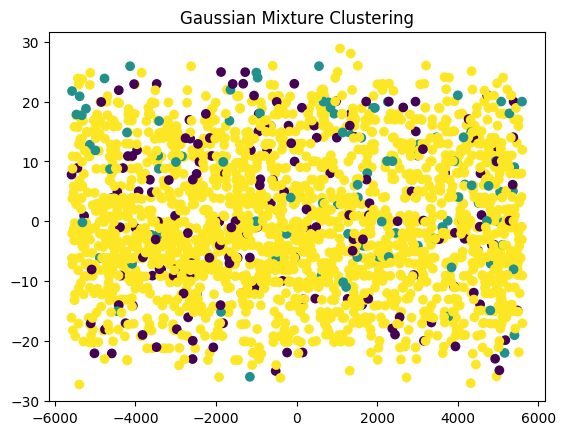

In [ ]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels_gmm)  # Replace labels_gmm with your Gaussian Mixture labels
plt.title("Gaussian Mixture Clustering")
plt.show()